# <div align=center>Types of Discretization<div>
<hr>

###  Custom Binning (Domain Binning)

**Definition:**  
Custom binning, also known as **domain binning**, is a data pre-processing technique where the bins are created using **domain knowledge, specific criteria, or predefined thresholds**, instead of relying on automated methods.  

This approach ensures that bins are **meaningful and interpretable** in the context of the problem domain or business objective.  

---

###  Key Characteristics
- Bins are defined **manually** based on domain expertise.  
- Thresholds often come from **rules, policies, or real-world standards**.  
- Improves **interpretability** since bins directly map to human-understandable categories.  

---

###  Examples of Custom Binning

1. **Tax Slabs**  
   - Income ranges grouped into tax brackets (e.g., ₹0–₹2.5L, ₹2.5L–₹5L, etc.).  

2. **Credit Score for Loan Eligibility**  
   - Grouping credit scores into categories like *Poor*, *Fair*, *Good*, *Excellent*.  

3. **Healthcare – BMI Indexing**  
   - BMI values binned into categories such as *Underweight*, *Normal*, *Overweight*, *Obese*.  

4. **Educational Grading System**  
   - Scores converted into grades (A, B, C, D, F).  

5. **Air Quality Reporting**  
   - AQI (Air Quality Index) levels classified into *Good*, *Moderate*, *Unhealthy*, *Hazardous*.  

---

###  Advantages
- Easy to **interpret and explain**.  
- Aligns with **regulatory or business rules**.  
- Works well when **clear thresholds** are known.  

###  Disadvantages
- Requires **strong domain knowledge**.  
- May be **biased** if thresholds are poorly chosen.  
- Less flexible compared to automated binning methods.  


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
data = data[['Age', 'Survived']].dropna()

data.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [3]:
# create custom bins
age_bins = [0, 18, 60, 100]
age_labels = ['Child', 'Adult', 'Senior']

In [4]:
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

In [5]:
data.sample(5)

,Age,Survived,Age Group
729,25.0,0,Adult
883,28.0,0,Adult
572,36.0,1,Adult
102,21.0,0,Adult
15,55.0,1,Adult


#  Uniform Binning (Equal-Width Binning)

---

##  What is Uniform Binning?
**Uniform Binning** (also called **Equal-Width Binning**) is a **discretization technique** where the range of a continuous variable is divided into **equal-width intervals (bins)**.  
- Each bin has the **same range of values**, but the **number of data points per bin may vary**.  
- Commonly used in preprocessing, visualization, and simplifying continuous variables.

---

##  Why Use Uniform Binning?
- To **simplify continuous data** into categories.  
- To **reduce noise and the effect of outliers** by grouping values.  
- To **make models more interpretable**, especially rule-based or categorical ones.  
- To **prepare data for algorithms** that require categorical input.  
- Acts as a form of **regularization**, reducing overfitting by limiting feature granularity.

---

##  Example: Temperature Data

| Day       | Temperature (°C) |
|-----------|------------------|
| Monday    | 16               |
| Tuesday   | 21               |
| Wednesday | 24               |
| Thursday  | 18               |
| Friday    | 30               |
| Saturday  | 26               |
| Sunday    | 22               |

**Step 1: Range** → Min = 16, Max = 30 → Range = 14  
**Step 2: Bins** → Suppose 3 bins → Bin width = 14 ÷ 3 = 4.67  

- Bin 1: 16 – 20.67  
- Bin 2: 20.68 – 25.34  
- Bin 3: 25.35 – 30  

| Day       | Temp | Bin   |
|-----------|------|-------|
| Monday    | 16   | Bin 1 |
| Tuesday   | 21   | Bin 2 |
| Wednesday | 24   | Bin 2 |
| Thursday  | 18   | Bin 1 |
| Friday    | 30   | Bin 3 |
| Saturday  | 26   | Bin 3 |
| Sunday    | 22   | Bin 2 |

---

##  When to Use Uniform Binning?
1. **Data is Fairly Evenly Distributed** (not highly skewed).  
2. **Interpretability is Important** – easy to explain as equal intervals.  
3. **No Domain Knowledge** – default option when custom cut-points are unknown.  
4. **Tree-Based Models** – they can refine splits inside bins if needed.  
5. **Visualization** – useful for histograms, bar charts, and heatmaps.  
6. **Limited Outliers** – works best when data range isn’t dominated by extreme values.  

---

##  When NOT to Use It?
-  Data is **highly skewed** → may result in empty/sparse bins.  
-  You need **meaningful domain thresholds** (e.g., tax brackets, BMI).  
-  You want **equal number of samples per bin** → use **Quantile Binning** instead.  

---

##  Advantages
1. **Simple & Easy** – quick to apply and interpret.  
2. **Uniform Intervals** – straightforward for comparison.  
3. **Good for Visualization** – histograms, density plots, heatmaps.  
4. **Supports Categorical Models** – prepares continuous variables for categorical methods.  

---

##  Disadvantages
1. **Uneven Distribution of Data** – bins may contain very different counts.  
2. **Sensitive to Outliers** – extreme values may stretch the bin range.  
3. **Loss of Information** – differences within a bin are ignored.  
4. **Arbitrary Choice of Bin Number** – too few bins → underfitting, too many bins → overfitting.  

---

##  How to Choose the Number of Bins?
Several rules of thumb exist:

1. **Sturges' Rule:**  
   $$
   k = 1 + \log_2(n)
   $$
   where \(n\) = number of data points.  

2. **Square-Root Rule:**  
   $$
   k = \sqrt{n}
   $$

3. **Rice Rule:**  
   $$
   k = 2 \cdot n^{1/3}
   $$ 

4. **Freedman-Diaconis Rule (Robust to Outliers):**  
   $$
   \text{Bin Width} = \frac{2 \cdot IQR}{n^{1/3}}
   $$
   where IQR = Interquartile Range.  

 In practice:  
- Use **domain knowledge** (e.g., age groups: 0–18, 19–35, etc.).  
- Try different bin numbers and evaluate model performance.   

---

##  What if Input Lies Outside Bin Range?
- If a **new data point is smaller than the min or larger than the max**, it **won’t fit into existing bins**.  
### Solutions:
1. **Extend Bin Edges** → add an "overflow" bin (e.g., `<16` or `>30`).  
2. **Clip to Nearest Bin** → assign the value to the closest available bin.  
3. **Dynamic Re-binning** → recalculate bins if dataset grows significantly.  
4. **Custom Handling** → domain-specific rules (e.g., treat new values as anomalies).  

---

- **Uniform Binning** is best for **simple, evenly spaced ranges**.  
- Great for **exploratory analysis, visualization, and categorical preparation**.  
- Be cautious with **skewed data, outliers, and bin count selection**.  
- Alternatives: **Quantile Binning (equal-frequency)**, **Custom/Domain Binning**, or **Clustering-based Binning**.  

---


In [6]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Survived']].dropna()

df.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Survived'], test_size=0.2, random_state=42)

In [8]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

X_train_binned = pd.DataFrame(discretizer.fit_transform(X_train), columns=discretizer.get_feature_names_out())
X_test_binned = pd.DataFrame(discretizer.transform(X_test), columns=discretizer.get_feature_names_out())

X_train_binned.head()

,Age
0,1.0
1,1.0
2,1.0
3,2.0
4,1.0


In [9]:
discretizer.bin_edges_

array([array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])],
      dtype=object)

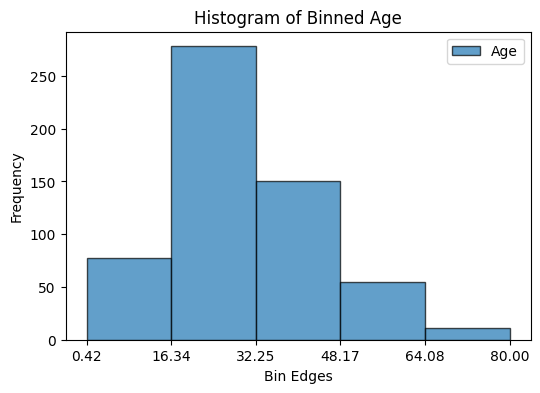

In [10]:
import matplotlib.pyplot as plt

# Extract the bin edges for the 'Age' feature from the nested array structure
age_bin_edges = discretizer.bin_edges_[0]

plt.figure(figsize=(6, 4))
# Use the extracted bin edges for plotting
plt.hist(X_train['Age'], bins=age_bin_edges, alpha=0.7, edgecolor='black', label='Age')
plt.title('Histogram of Binned Age')
plt.xlabel('Bin Edges')
plt.ylabel('Frequency')
plt.xticks(age_bin_edges)
plt.legend()
plt.show()

In [11]:
# A quick question
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Sex', 'Survived']]

df.head()

,Age,Sex,Survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Sex']], df['Survived'], test_size=0.2, random_state=42)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Pipeline for processing the 'Age' column
age_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with the median
    ('binning', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform'))  # Then bin the data
])

In [14]:
# ColumnTransformer for applying different transformations
preprocessor = ColumnTransformer(transformers=[
    ('age', age_pipeline, ['Age']),  # Apply age_pipeline to 'Age'
    ('sex', OneHotEncoder(), ['Sex'])  # Apply OneHotEncoder to 'Sex'
])

In [15]:
from sklearn.linear_model import LogisticRegression

full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())  # Use logistic regression as the model
])

In [16]:
full_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('age', ...), ('sex', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


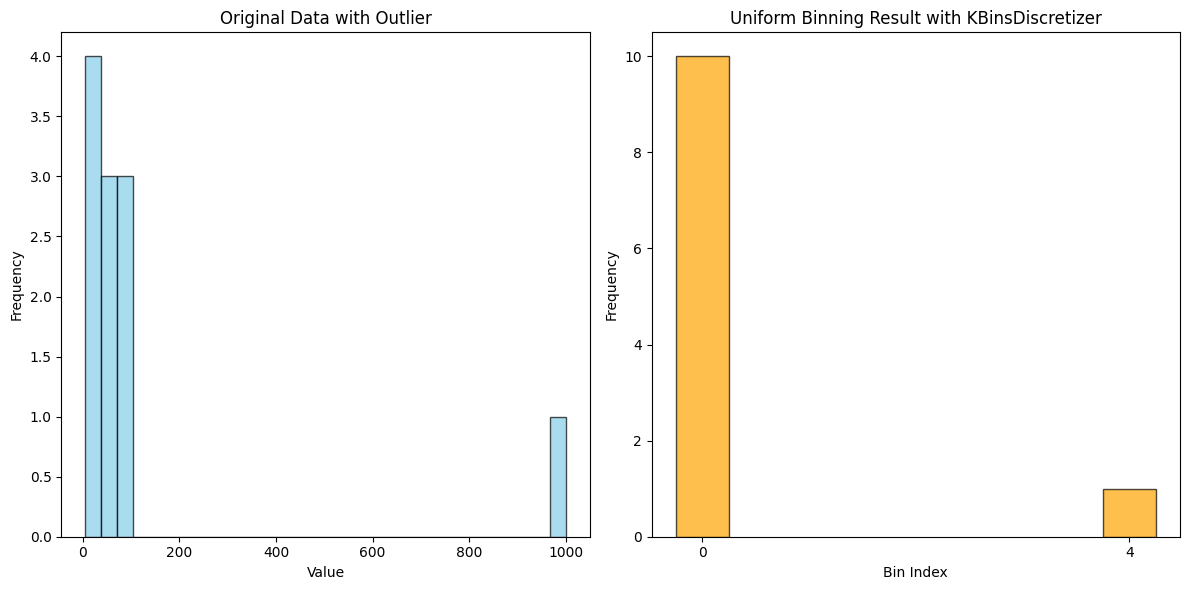

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 1000])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


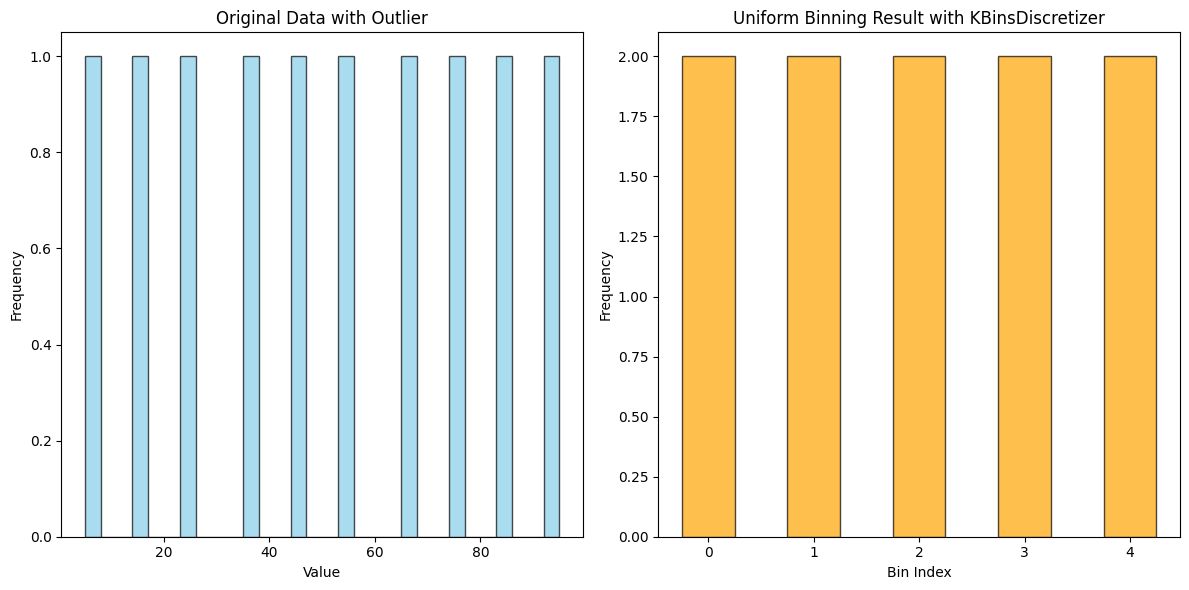

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


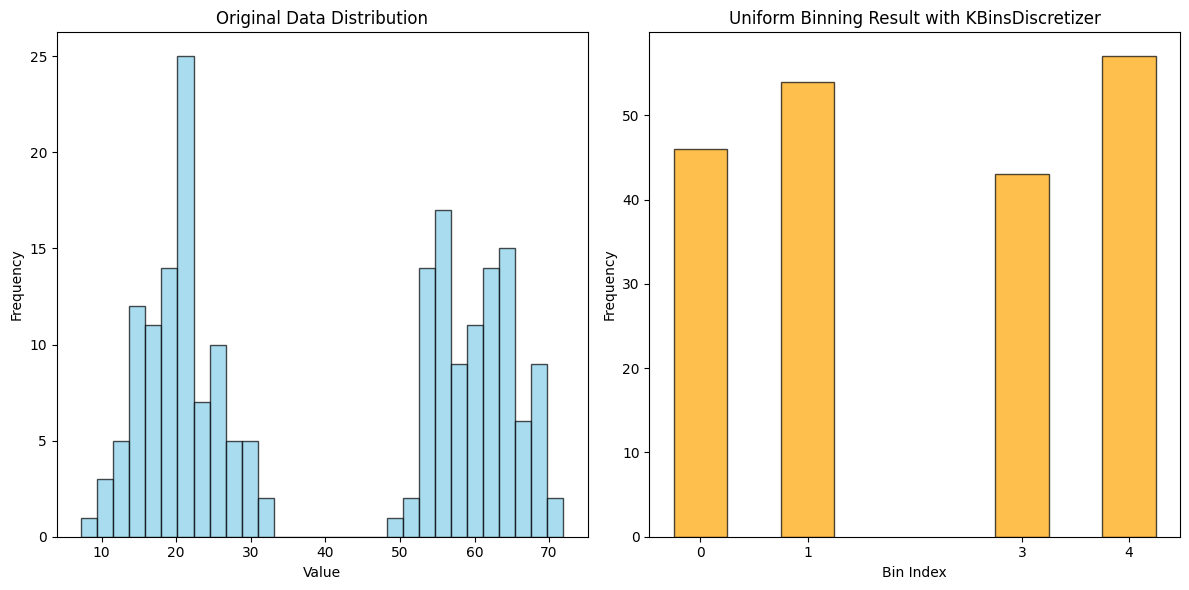

In [19]:
# problem 2 - not adaptive

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generating two clusters of data
data_cluster_1 = np.random.normal(loc=20, scale=5, size=100)  # Cluster 1 centered around 20
data_cluster_2 = np.random.normal(loc=60, scale=5, size=100)  # Cluster 2 centered around 60

# Combining the two clusters into a single dataset
data = np.concatenate([data_cluster_1, data_cluster_2])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Initialize KBinsDiscretizer for uniform binning
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data distribution and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# For each unique bin, count the occurrences and plot
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


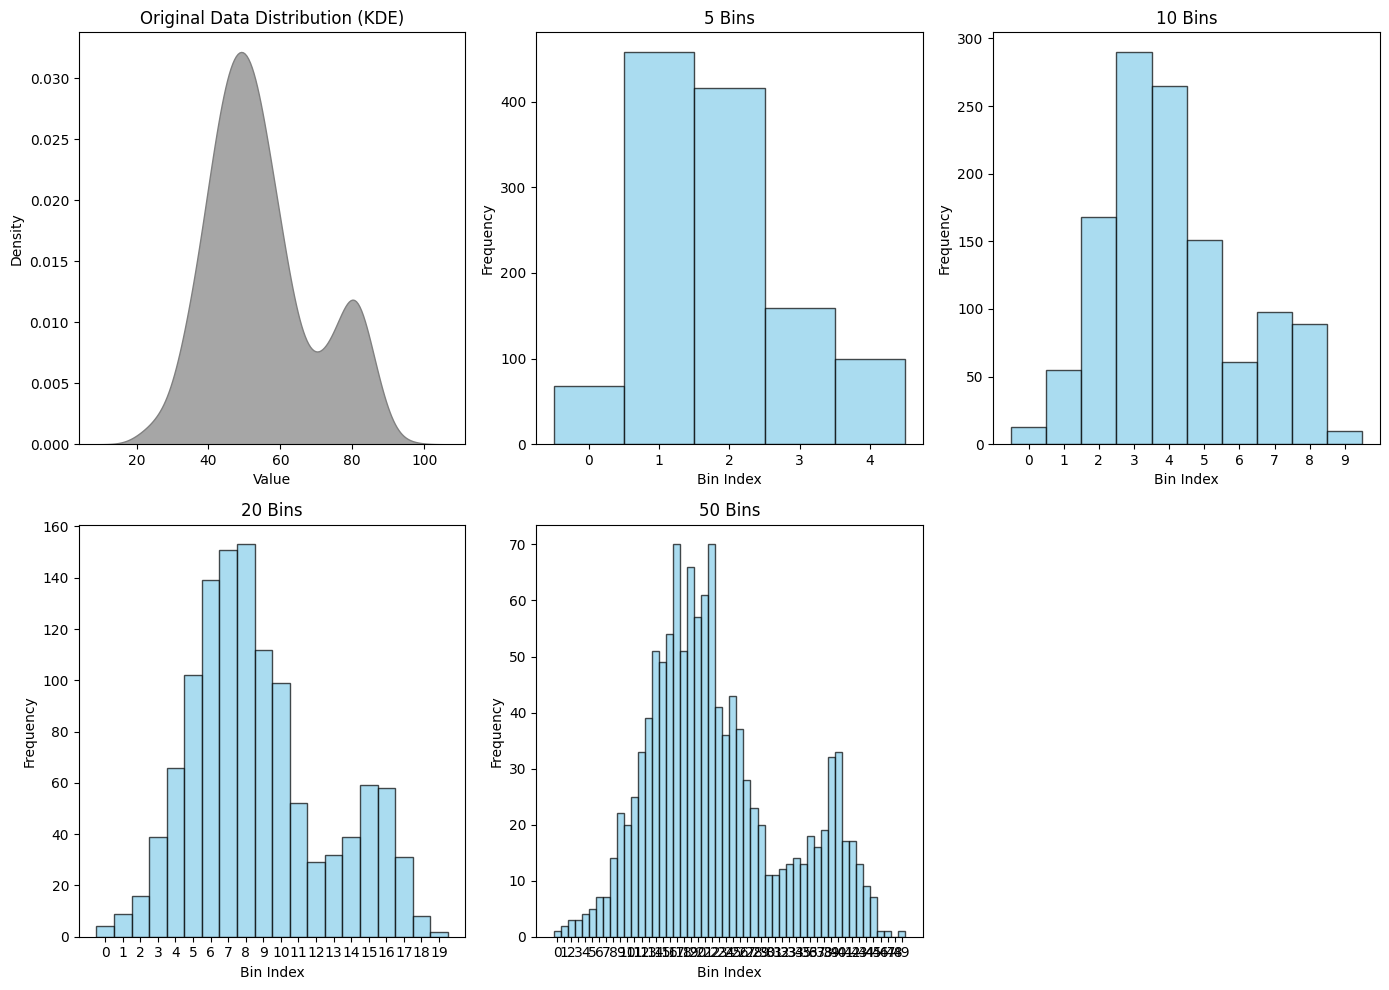

In [20]:
# Problem #3 - Seelcting # of bins

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generate a normally distributed dataset with an additional cluster
data_normal = np.random.normal(loc=50, scale=10, size=1000)
data_cluster = np.random.normal(loc=80, scale=5, size=200)
data = np.concatenate([data_normal, data_cluster]).reshape(-1, 1)  # Reshape for KBinsDiscretizer

# Different choices for the number of bins
bin_choices = [5, 10, 20, 50]

plt.figure(figsize=(14, 10))

# Plot the original data distribution using KDE
plt.subplot(2, 3, 1)
sns.kdeplot(data[:, 0], fill=True, color='gray', alpha=0.7)
plt.title('Original Data Distribution (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')

# Apply KBinsDiscretizer and plot histograms for each bin choice
for i, n_bins in enumerate(bin_choices, start=2):
    # Initialize and fit the KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    data_binned = discretizer.fit_transform(data)

    # Plot histogram of the binned data
    plt.subplot(2, 3, i)
    # We plot the binned data by the bin indices and need to calculate the bin width for plotting
    bin_edges = discretizer.bin_edges_[0]
    plt.hist(data_binned, bins=np.arange(len(bin_edges)), align='left', color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f'{n_bins} Bins')
    plt.xlabel('Bin Index')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(len(bin_edges) - 1))

plt.tight_layout()
plt.show()


#  Quantile Binning (Equal-Frequency Binning)

---

##  What is Quantile Binning?
**Quantile Binning** (also called **Equal-Frequency Binning**) is a discretization technique where:  
- Data is divided into bins such that **each bin contains (almost) the same number of observations**, regardless of value ranges.  
- Unlike **Uniform Binning** (equal-width), quantile binning ensures **balanced sample counts** across bins.  

This is especially useful for handling **skewed data**.

---

##  Example Dataset

**Original Data:**  
`25, 30, 45, 22, 34, 28, 55, 43, 30, 31, 49, 27`  

**Sorted Data:**  
`22, 25, 27, 28, 30, 30, 31, 34, 43, 45, 49, 55`  

---

### Step 1: Decide Number of Bins
Suppose we want **4 bins (quartiles)**.  
Since there are 12 data points, each bin should contain **12 ÷ 4 = 3 values**.  

---

### Step 2: Determine Bin Ranges
- **Bin 1 (Q1): 22 → 27** → [22, 25, 27]  
- **Bin 2 (Q2): 28 → 30** → [28, 30, 30]  
- **Bin 3 (Q3): 31 → 43** → [31, 34, 43]  
- **Bin 4 (Q4): 45 → 55** → [45, 49, 55]  

---

### Step 3: Assign Bins to Data

| Value | Bin   | Range      |
|-------|-------|------------|
| 22    | Bin 1 | 22 – 27    |
| 25    | Bin 1 | 22 – 27    |
| 27    | Bin 1 | 22 – 27    |
| 28    | Bin 2 | 28 – 30    |
| 30    | Bin 2 | 28 – 30    |
| 30    | Bin 2 | 28 – 30    |
| 31    | Bin 3 | 31 – 43    |
| 34    | Bin 3 | 31 – 43    |
| 43    | Bin 3 | 31 – 43    |
| 45    | Bin 4 | 45 – 55    |
| 49    | Bin 4 | 45 – 55    |
| 55    | Bin 4 | 45 – 55    |

---

##  Advantages
1. **Mitigates outlier impact** by balancing across bins.  
2. **Handles skewed distributions** better than uniform binning.  
3. **Equal representation** of bins → prevents empty or sparse bins.  
4. Useful for models needing **balanced categorical inputs**.  

---

##  Disadvantages
1. **Irregular bin ranges** → harder to interpret.  
2. **Loss of true data distribution** → distances between values ignored.  
3. **Choosing number of bins is tricky** → too few bins = loss of detail, too many bins = overfitting.  
4. May not suit **time-series or ordinal data** where continuity matters.  

---

##  When to Use Quantile Binning
-  When the data is **skewed**.  
-  When bins should have **equal representation** of data.  
-  When using algorithms sensitive to **imbalanced features** (e.g., Naive Bayes, Logistic Regression with categorical bins).  
-  For **robustness against outliers**.  

---

##  When NOT to Use Quantile Binning
-  When **interpretability is crucial** (since bin ranges are irregular).  
-  For **time-series or ordered features** where maintaining intervals is important.  
-  When data is **uniformly distributed** → uniform binning may be simpler and clearer.  
-  In cases where **exact numerical differences** matter (e.g., regression without transformation).  

---

- **Quantile Binning = Equal number of data points per bin.**  
- Best for **skewed data** and when **equal representation** is needed.  
- Less interpretable than **Uniform Binning**, but more **robust to outliers**.  

---


In [21]:
data = np.array([22, 25, 27, 28, 30, 31, 34, 38, 43, 45, 49, 55])
data

array([22, 25, 27, 28, 30, 31, 34, 38, 43, 45, 49, 55])

In [22]:
np.percentile(data, 25)

np.float64(27.75)

In [23]:
np.percentile(data, 50)

np.float64(32.5)

In [24]:
np.percentile(data, 75)

np.float64(43.5)

In [25]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Survived']].dropna()

df.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Survived'], test_size=0.2, random_state=42)

In [27]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

X_train_binned = pd.DataFrame(discretizer.fit_transform(X_train), columns=discretizer.get_feature_names_out())
X_test_binned = pd.DataFrame(discretizer.transform(X_test), columns=discretizer.get_feature_names_out())

X_train_binned.head()

C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


,Age
0,2.0
1,2.0
2,2.0
3,3.0
4,2.0


In [28]:
discretizer.bin_edges_

array([array([ 0.42, 19.  , 25.  , 32.  , 42.  , 80.  ])], dtype=object)

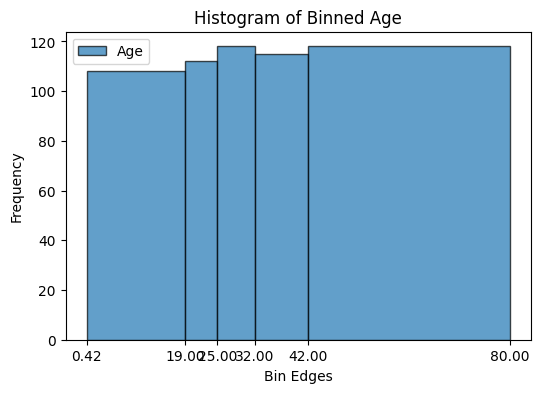

In [29]:
import matplotlib.pyplot as plt

# Extract the bin edges for the 'Age' feature from the nested array structure
age_bin_edges = discretizer.bin_edges_[0]

plt.figure(figsize=(6, 4))
# Use the extracted bin edges for plotting
plt.hist(X_train['Age'], bins=age_bin_edges, alpha=0.7, edgecolor='black', label='Age')
plt.title('Histogram of Binned Age')
plt.xlabel('Bin Edges')
plt.ylabel('Frequency')
plt.xticks(age_bin_edges)
plt.legend()
plt.show()

C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


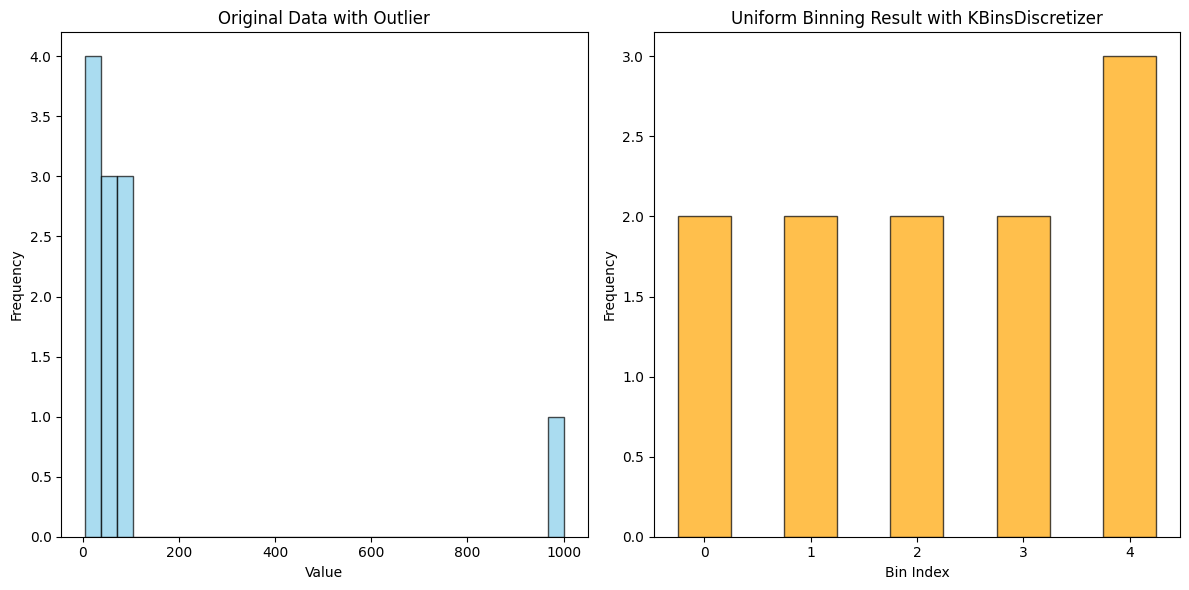

In [30]:
# impact of outlliers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 1000])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


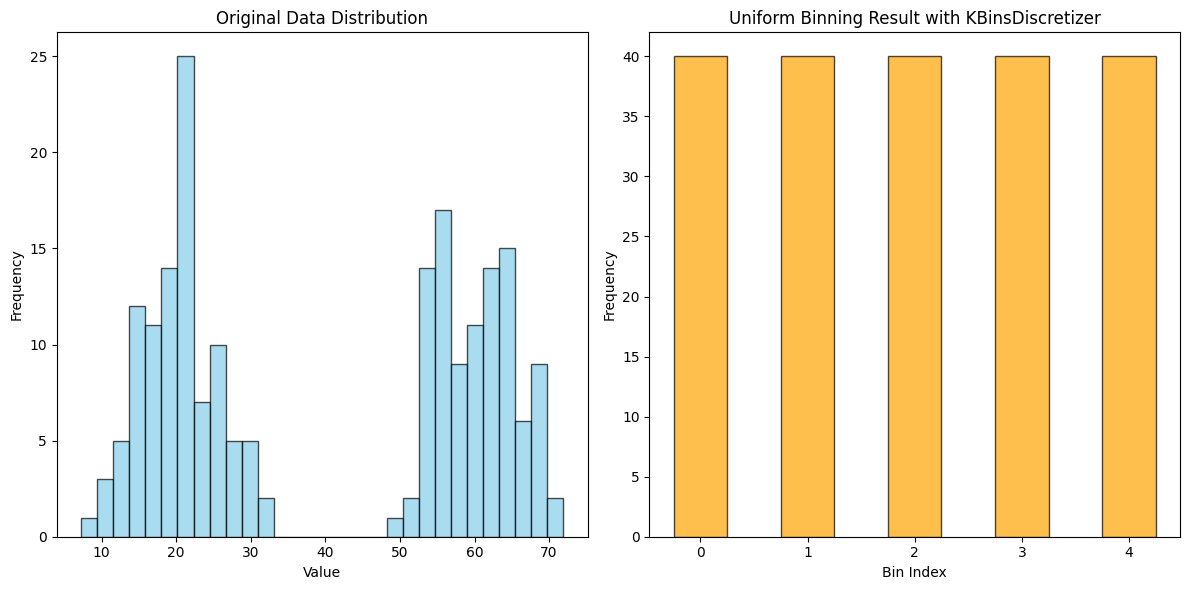

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generating two clusters of data
data_cluster_1 = np.random.normal(loc=20, scale=5, size=100)  # Cluster 1 centered around 20
data_cluster_2 = np.random.normal(loc=60, scale=5, size=100)  # Cluster 2 centered around 60

# Combining the two clusters into a single dataset
data = np.concatenate([data_cluster_1, data_cluster_2])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Initialize KBinsDiscretizer for uniform binning
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data distribution and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# For each unique bin, count the occurrences and plot
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py

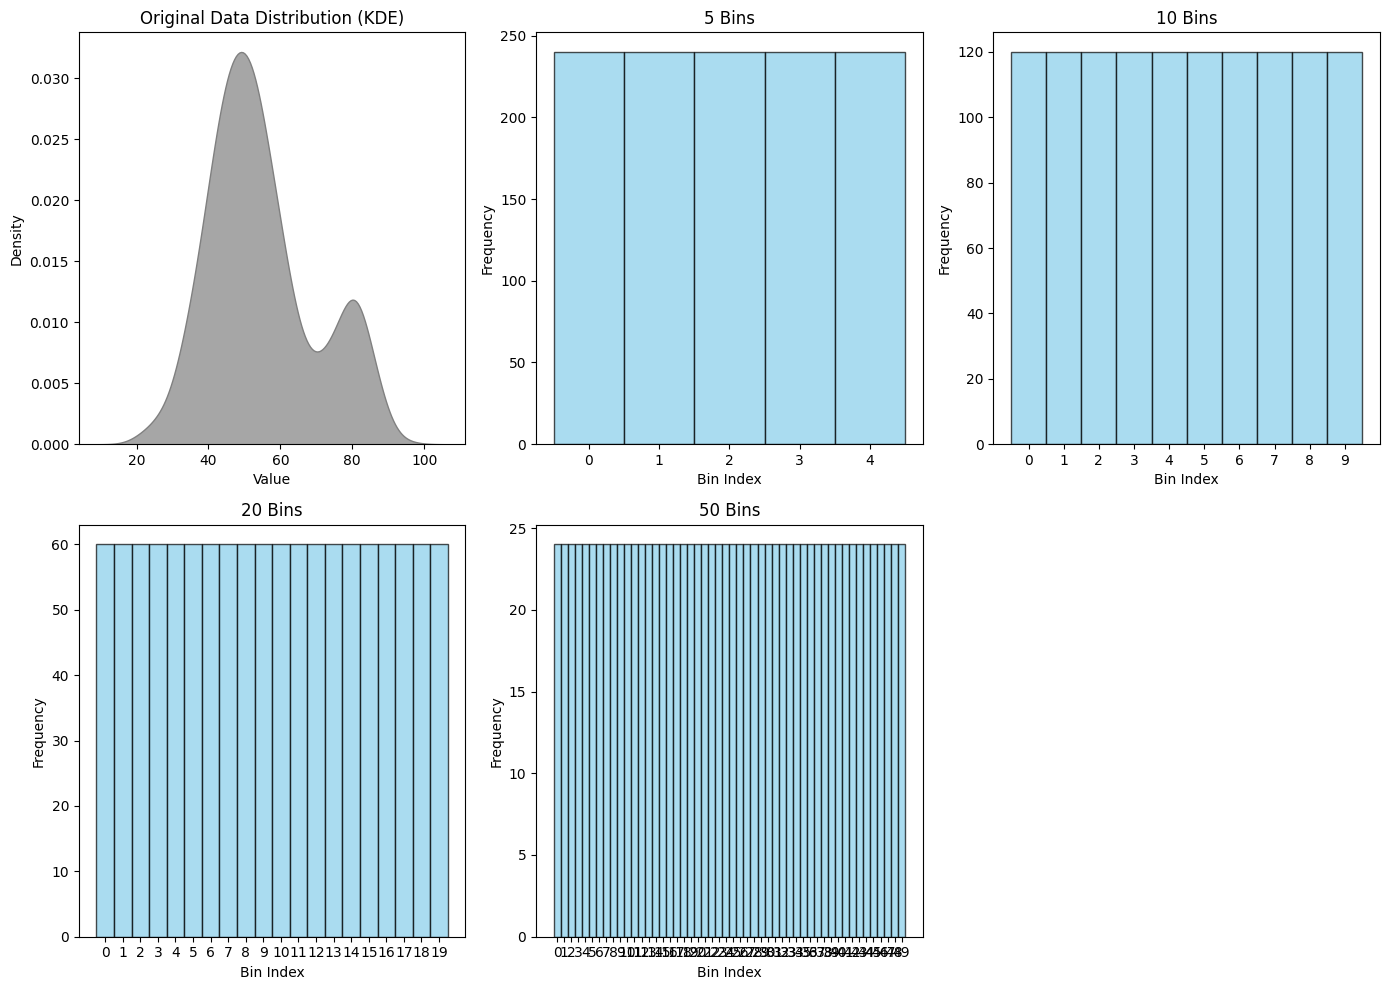

In [32]:
# Problem #3 - Seelcting # of bins

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generate a normally distributed dataset with an additional cluster
data_normal = np.random.normal(loc=50, scale=10, size=1000)
data_cluster = np.random.normal(loc=80, scale=5, size=200)
data = np.concatenate([data_normal, data_cluster]).reshape(-1, 1)  # Reshape for KBinsDiscretizer

# Different choices for the number of bins
bin_choices = [5, 10, 20, 50]

plt.figure(figsize=(14, 10))

# Plot the original data distribution using KDE
plt.subplot(2, 3, 1)
sns.kdeplot(data[:, 0], fill=True, color='gray', alpha=0.7)
plt.title('Original Data Distribution (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')

# Apply KBinsDiscretizer and plot histograms for each bin choice
for i, n_bins in enumerate(bin_choices, start=2):
    # Initialize and fit the KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    data_binned = discretizer.fit_transform(data)

    # Plot histogram of the binned data
    plt.subplot(2, 3, i)
    # We plot the binned data by the bin indices and need to calculate the bin width for plotting
    bin_edges = discretizer.bin_edges_[0]
    plt.hist(data_binned, bins=np.arange(len(bin_edges)), align='left', color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f'{n_bins} Bins')
    plt.xlabel('Bin Index')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(len(bin_edges) - 1))

plt.tight_layout()
plt.show()


#  K-Means Binning (Clustering-Based Binning)

---

##  What is K-Means Binning?
**K-Means Binning** is a discretization technique where continuous values are grouped into bins using the **K-Means clustering algorithm**.  
Instead of fixed-width or fixed-frequency intervals, K-Means forms clusters based on **similarity of values**, and each cluster is treated as a bin.  

This makes it **data-driven** rather than rule-driven, adapting to the actual distribution of the feature.

---

##  How It Works
1. Choose the number of clusters (**k** = number of bins).  
2. Run **K-Means clustering** on the feature values.  
3. Assign each data point to the nearest cluster centroid.  
4. Replace values with their **cluster labels (bin numbers)**.  

---

##  Example

**Data:**  
`5, 7, 8, 12, 15, 18, 25, 26, 28, 40, 45, 48`

**Step 1:** Decide number of bins → Suppose **k = 3**.  
**Step 2:** K-Means finds 3 cluster centroids → approx `[7, 18, 44]`.  
**Step 3:** Assign data points to nearest centroid:  

- **Cluster 1 (Bin 1)** → [5, 7, 8]  
- **Cluster 2 (Bin 2)** → [12, 15, 18, 25, 26, 28]  
- **Cluster 3 (Bin 3)** → [40, 45, 48]  

**Final Encoded Data (Cluster Labels):**  
`[1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3]`

---

##  Advantages
1. **Adaptive** – adjusts to the actual data distribution.  
2. **Minimizes within-bin variance** – groups similar values together.  
3. **Helps discover natural groupings** in the data.  
4. **Can find an ideal number of bins** using methods like the **Elbow Method** or **Silhouette Score**.  

---

##  Disadvantages
1. **Sensitive to initialization** – results may vary based on starting centroids.  
2. **Computationally expensive** – slower than simple binning methods.  
3. Assumes **clusters are spherical and similar in size**, which may not hold true.  
4. **Poor handling of outliers** – extreme values can distort clusters.  
5. **Interpretability issue** – bins may not have intuitive boundaries.  

---

##  When to Use K-Means Binning
-  When data has **natural groupings/clusters**.  
-  When distributions are **skewed or irregular**.  
-  When you want to **minimize information loss** while discretizing.  
-  In **unsupervised preprocessing pipelines** before feeding data to ML models.  

---

##  When NOT to Use
-  For **very small datasets** (clusters won’t be reliable).  
-  When **interpretability** is more important than precision (e.g., tax slabs).  
-  When you need **real-time binning** → K-Means is computationally heavier.  
-  When the feature has **few unique values** (simple binning is enough).  

---

- **Uniform Binning** → Equal width.  
- **Quantile Binning** → Equal frequency.  
- **K-Means Binning** → **Data-driven clusters**.  

K-Means Binning is powerful when you want bins that **adapt to the structure of data** rather than being forced into equal ranges or equal counts.

---


In [33]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Survived']].dropna()

df.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Survived'], test_size=0.2, random_state=42)

In [35]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

X_train_binned = pd.DataFrame(discretizer.fit_transform(X_train), columns=discretizer.get_feature_names_out())
X_test_binned = pd.DataFrame(discretizer.transform(X_test), columns=discretizer.get_feature_names_out())

X_train_binned.head()

,Age
0,2.0
1,1.0
2,2.0
3,2.0
4,1.0


In [36]:
discretizer.bin_edges_

array([array([ 0.42      , 12.69636862, 27.02765256, 39.35418895, 54.21464646,
              80.        ])                                                   ],
      dtype=object)

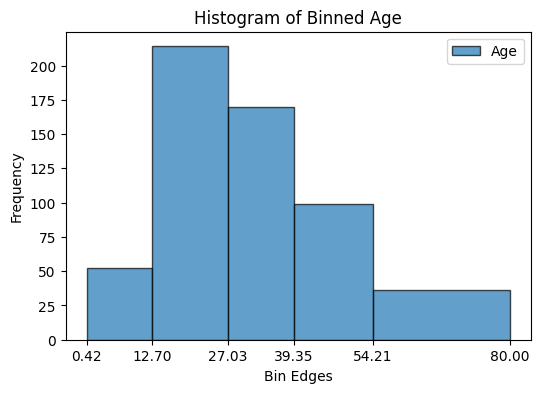

In [37]:
import matplotlib.pyplot as plt

# Extract the bin edges for the 'Age' feature from the nested array structure
age_bin_edges = discretizer.bin_edges_[0]

plt.figure(figsize=(6, 4))
# Use the extracted bin edges for plotting
plt.hist(X_train['Age'], bins=age_bin_edges, alpha=0.7, edgecolor='black', label='Age')
plt.title('Histogram of Binned Age')
plt.xlabel('Bin Edges')
plt.ylabel('Frequency')
plt.xticks(age_bin_edges)
plt.legend()
plt.show()

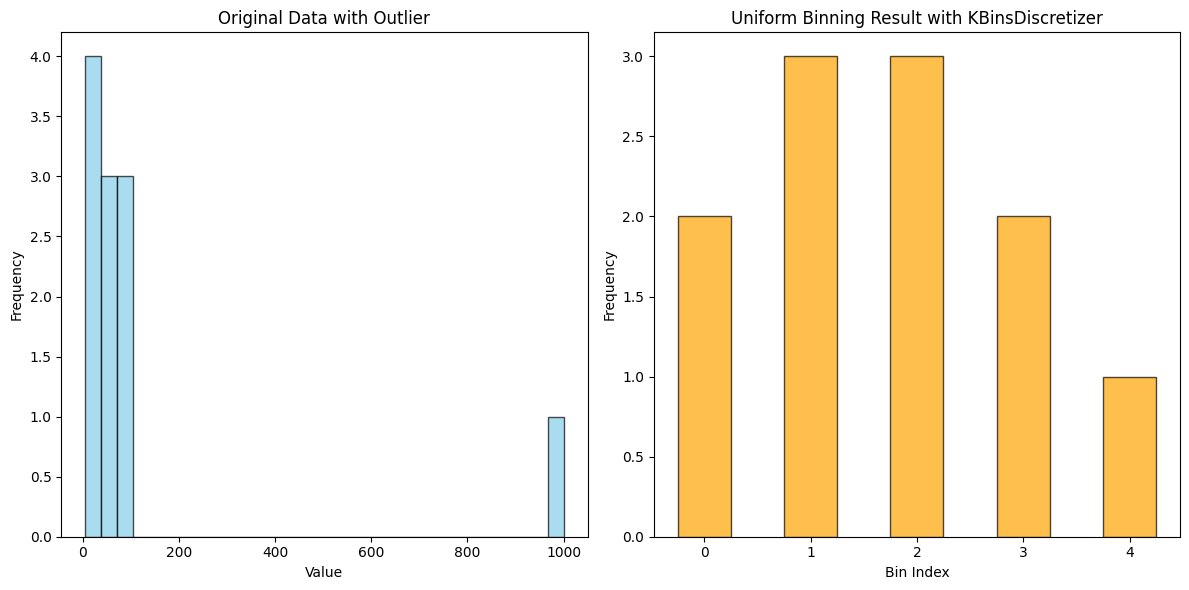

In [38]:
# impact of outlliers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 1000])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


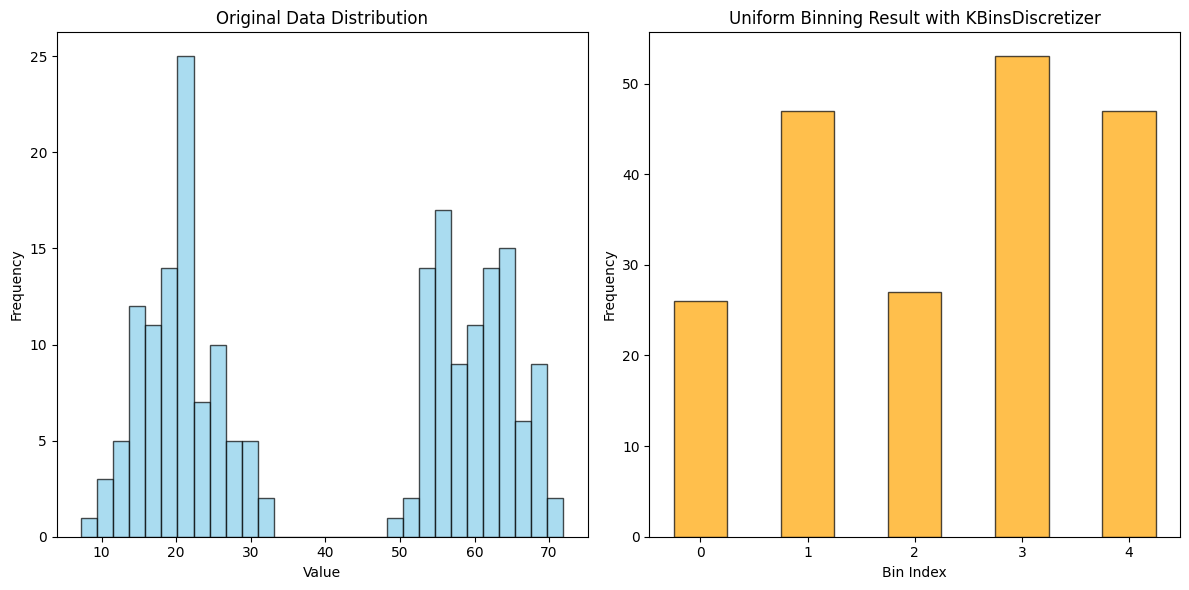

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generating two clusters of data
data_cluster_1 = np.random.normal(loc=20, scale=5, size=100)  # Cluster 1 centered around 20
data_cluster_2 = np.random.normal(loc=60, scale=5, size=100)  # Cluster 2 centered around 60

# Combining the two clusters into a single dataset
data = np.concatenate([data_cluster_1, data_cluster_2])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Initialize KBinsDiscretizer for uniform binning
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data distribution and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# For each unique bin, count the occurrences and plot
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


#  Binarization (Threshold Binning)

---

##  What is Binarization?
**Binarization** is a **discretization technique** where continuous variables are converted into **two categories (0/1)** based on a chosen **threshold**.  
It is the simplest form of binning and transforms numerical values into binary categories.  

This technique is also known as **thresholding** or **binary binning**.

---

##  How It Works
1. Select a **threshold value (t)**.  
2. For each data point `x`:  
   - If `x > t`, assign **1**  
   - If `x ≤ t`, assign **0**  

---

##  Example

**Data (Exam Scores):**  
`35, 42, 55, 61, 72, 85, 90`

**Threshold (t = 60):**  

| Score | Binarized |
|-------|-----------|
| 35    | 0         |
| 42    | 0         |
| 55    | 0         |
| 61    | 1         |
| 72    | 1         |
| 85    | 1         |
| 90    | 1         |

**Interpretation:**  
- **0 = Fail (≤ 60)**  
- **1 = Pass (> 60)**  

---

##  Advantages
1. **Simple & Fast** → very easy to implement.  
2. **Useful for binary classification tasks** (e.g., Pass/Fail, Default/No Default).  
3. **Reduces noise** by grouping values into two categories.  
4. **Interpretability** → bins are intuitive when based on domain rules (e.g., age > 18 = adult).  

---

##  Disadvantages
1. **Information Loss** → reduces continuous data into only two categories.  
2. **Threshold Selection is Arbitrary** → choosing the wrong threshold may misrepresent data.  
3. Not suitable for **complex relationships** where more than two bins are needed.  
4. **Sensitive to outliers** if threshold is not chosen carefully.  

---

##  When to Use Binarization
-  When the problem is **naturally binary** (e.g., Yes/No, Success/Failure).  
-  For **rule-based cutoffs** (e.g., age ≥ 18 = adult, temperature ≥ 38°C = fever).  
-  In **feature engineering for linear models** → converts numerical data into binary indicators.  
-  In **text mining / ML preprocessing** (e.g., presence/absence of a word).  

---

##  When NOT to Use
-  When the data has **complex patterns** that require multiple bins.  
-  For **skewed distributions**, where one bin dominates.  
-  When the threshold has **no domain meaning** (random cutoff may mislead the model).  

---

- **Binarization** reduces continuous data into **two categories** based on a threshold.  
- It is best for **binary classification tasks** or **domain-driven thresholds**.  
- However, it can lead to **information loss** if used inappropriately.  

---


In [40]:
from sklearn.preprocessing import Binarizer

# Sample data
data = [[-1, 2, -3], [5, -6, 7]]

# Initialize the Binarizer with a threshold of 0
binarizer = Binarizer(threshold=0)

# Transform the data
binary_data = binarizer.fit_transform(data)

print(binary_data)


[[0 1 0]
 [1 0 1]]


#  Decision Tree Binning

---

##  What is Decision Tree Binning?
**Decision Tree Binning** is a **supervised discretization technique** that uses a **decision tree model** to split a continuous variable into bins (intervals).  
The split points (bin boundaries) are determined based on the values that best separate the **target variable** (y).  

Unlike **unsupervised methods** (like uniform or quantile binning), this method **uses label information** to create bins that are more predictive.

---

##  How It Works
1. Train a **Decision Tree classifier/regressor** using the feature to be binned (`X`) and the target variable (`y`).  
2. The **splitting points** chosen by the tree become the **bin boundaries**.  
3. Each leaf node of the tree represents one bin.  

---

##  Example

Suppose we have student scores and we want to predict **Pass/Fail**.

**Data (Scores vs Pass/Fail):**

| Score | Pass (y) |
|-------|----------|
| 35    | 0        |
| 42    | 0        |
| 55    | 0        |
| 61    | 1        |
| 72    | 1        |
| 85    | 1        |
| 90    | 1        |

### Decision Tree learns:
- Split at **60** → best separates Fail/Pass.  
- Split at **80** → further separates strong pass vs average pass.  

So the bins become:
- **[0, 60] → Fail (Bin 1)**  
- **(60, 80] → Pass (Bin 2)**  
- **(80, ∞) → Strong Pass (Bin 3)**  

---

##  Advantages
1. **Supervised** → takes target variable into account.  
2. Produces **informative bins** that improve model accuracy.  
3. Handles **non-linear relationships** between feature and target.  
4. Automatically **chooses optimal split points**.  

---

##  Disadvantages
1. **Risk of overfitting** if tree is too deep (too many bins).  
2. **Dependent on target variable** → bins may not generalize well if target changes.  
3. More **complex** compared to uniform/quantile binning.  
4. Requires **sufficient data** to find meaningful splits.  

---

##  When to Use
-  When you want bins that are **predictive of the target variable**.  
-  Useful in **credit scoring, churn prediction, risk modeling**.  
-  When uniform/quantile bins lose predictive power.  

---

##  When NOT to Use
-  When the dataset is **too small** → tree may not find stable splits.  
-  For purely **unsupervised preprocessing** (since this needs labels).  
-  When **interpretability** is more important than predictive power (tree bins may not be intuitive).  

---


In [41]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Sample data (feature and target)
X = np.array([[6], [12], [14], [18], [22], [24], [29], [33], [37], [40]])
y = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])  # Binary target for simplicity

# Train a decision tree on the data
tree = DecisionTreeClassifier(max_leaf_nodes=4)  # Restricting tree size for simple binning
tree.fit(X, y)




,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,4
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.875, 'x[0] <= 16.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[0] <= 26.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 23.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

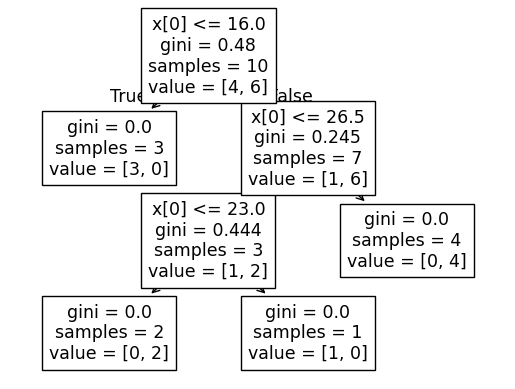

In [42]:
from sklearn.tree import plot_tree
plot_tree(tree)

In [43]:
# Extract split points (thresholds) from the tree to define bin edges
split_points = tree.tree_.threshold[tree.tree_.threshold != -2]
split_points

array([16. , 26.5, 23. ])

In [44]:
# Add the minimum and maximum values to cover the full range of X
bin_edges = np.sort(np.concatenate(([X.min()], split_points, [X.max()])))

print("Bin edges:", bin_edges)

Bin edges: [ 6.  16.  23.  26.5 40. ]


In [45]:
# Function to assign bins
def assign_bins(data, edges):
    bins = np.digitize(data, edges, right=False)  # Assign bins based on edges
    # Adjusting bins to be 1-indexed instead of 0-indexed
    # and ensuring values fall into n_bins categories
    bins = np.clip(bins, 1, len(edges)-1)
    return bins

In [46]:
# Assign each data point to a bin
bins_assigned = assign_bins(X, bin_edges)

# Print the assigned bins for each data point
for value, bin_num in zip(X.flatten(), bins_assigned):
    print(f"Value: {value} assigned to Bin: {bin_num}")

Value: 6 assigned to Bin: [1]
Value: 12 assigned to Bin: [1]
Value: 14 assigned to Bin: [1]
Value: 18 assigned to Bin: [2]
Value: 22 assigned to Bin: [2]
Value: 24 assigned to Bin: [3]
Value: 29 assigned to Bin: [4]
Value: 33 assigned to Bin: [4]
Value: 37 assigned to Bin: [4]
Value: 40 assigned to Bin: [4]
